In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

- Load the data and generate summary statistics

In [2]:
df = pd.read_csv('hotel_bookings.csv')

# show first 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# get summary of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# get the number of numerical & categorical columns

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"The number of categorical columns {len(cat_cols)}")
print(f"The number of numerical columns {len(num_cols)}")

The number of categorical columns 12
The number of numerical columns 20


In [5]:
# get summary statistical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


- Identify all missing values

In [6]:
# check the number of missing with pandas DataFrame
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
# get the columns which the percentage of missing values is great than 0%

missing_perc = (df.isna().sum() / len(df)) * 100
missing_perc[missing_perc > 0]


,0
children,0.003350
country,0.408744
agent,13.686238
company,94.306893


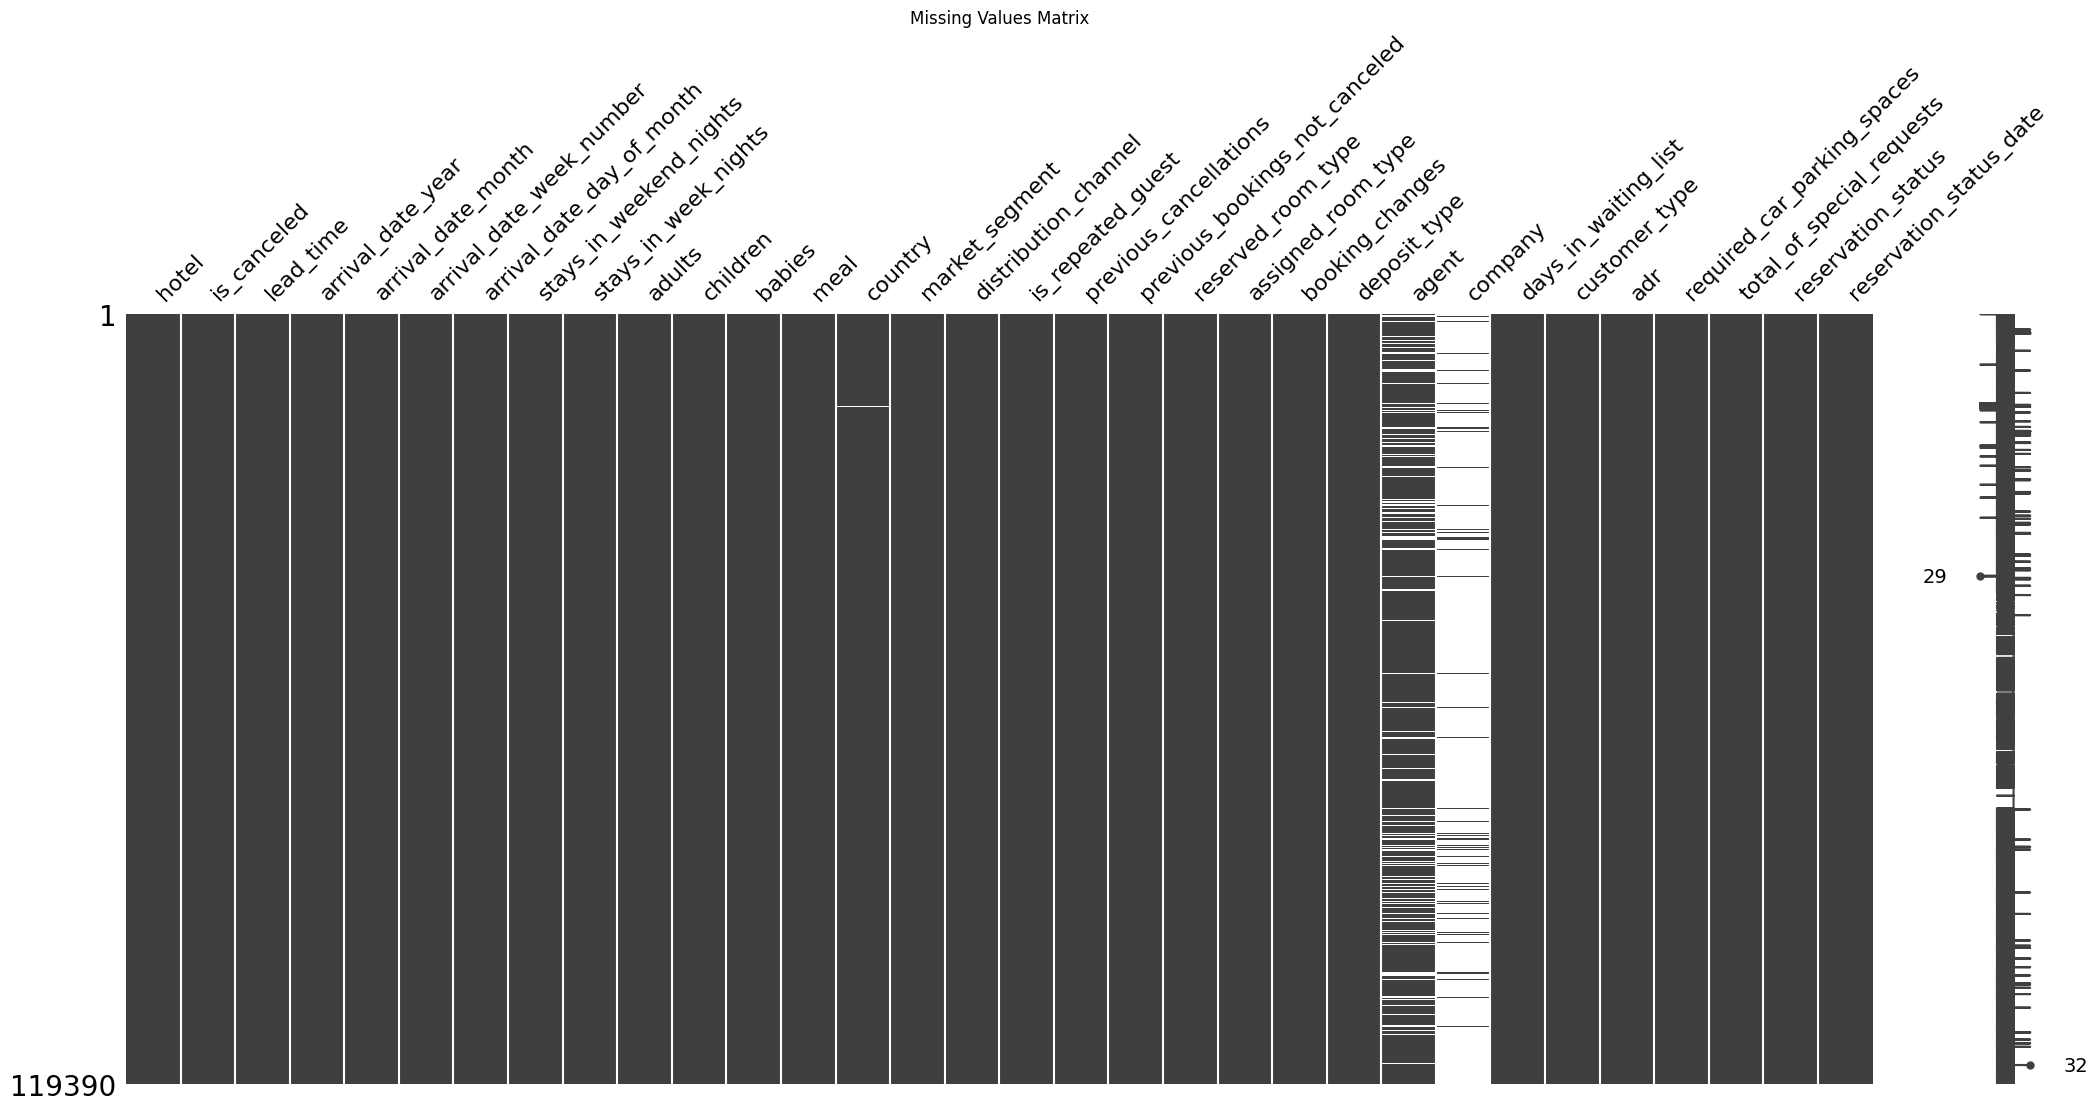

In [8]:
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

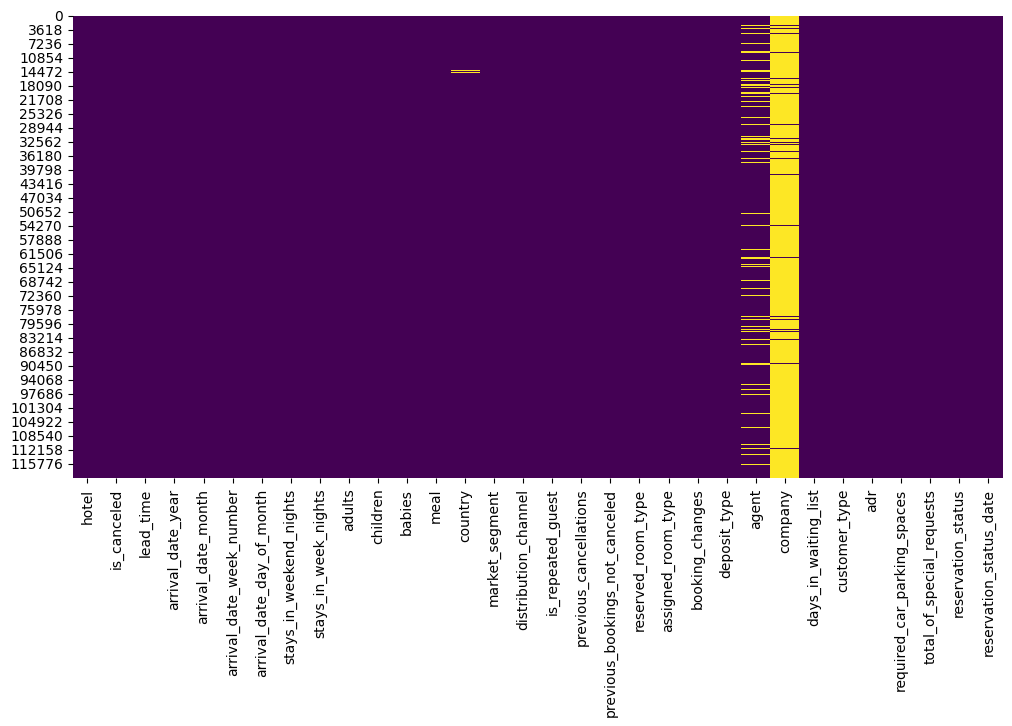

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

- Detect outliers

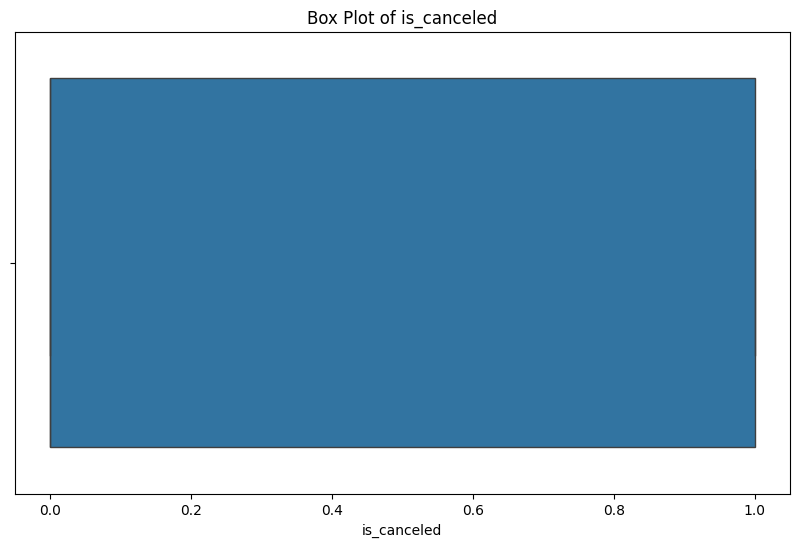

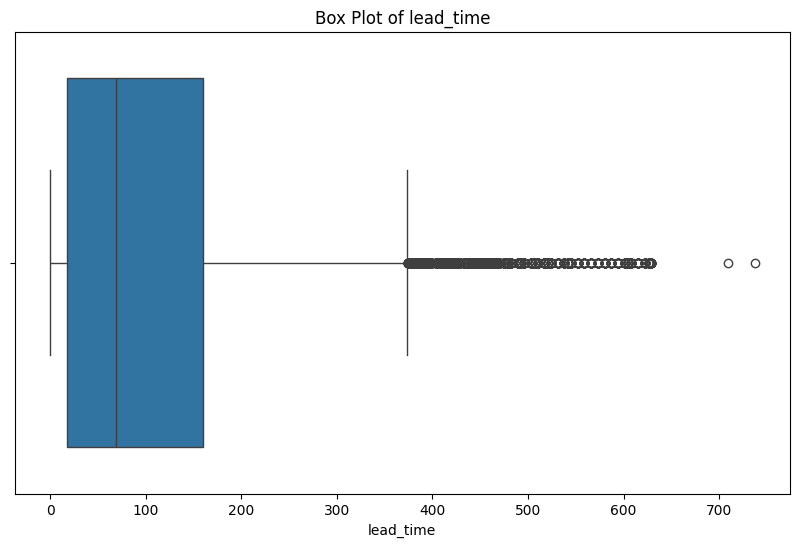

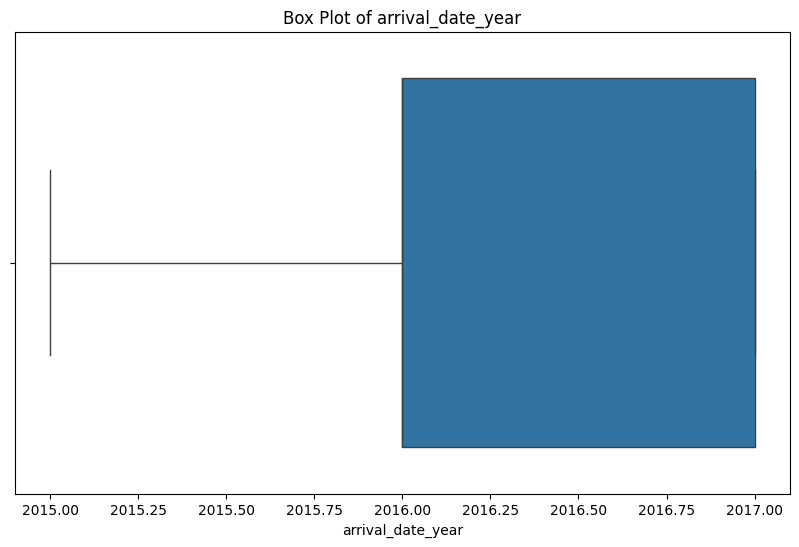

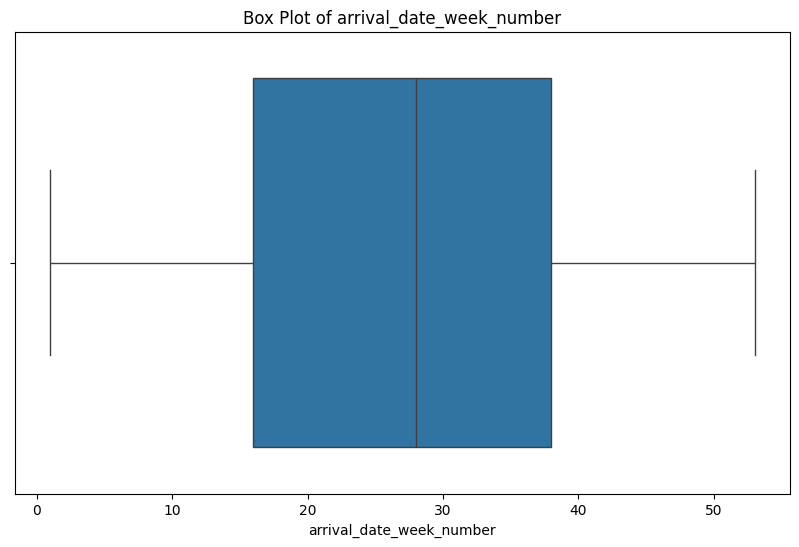

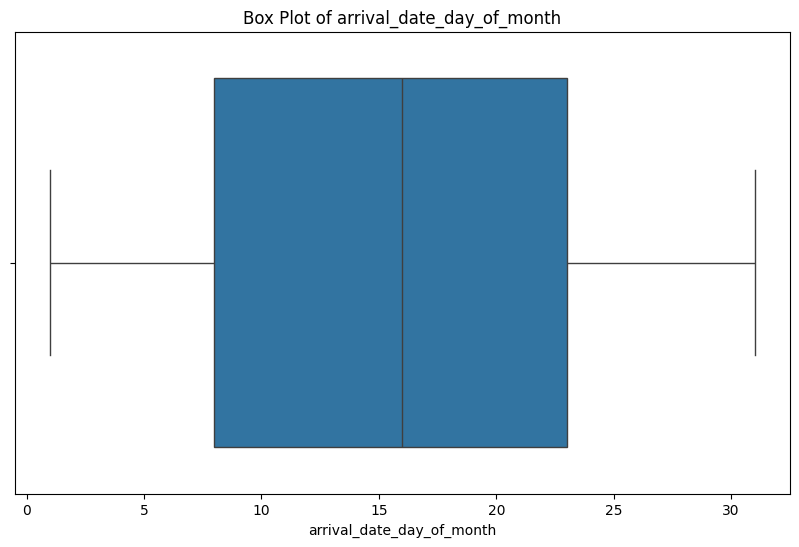

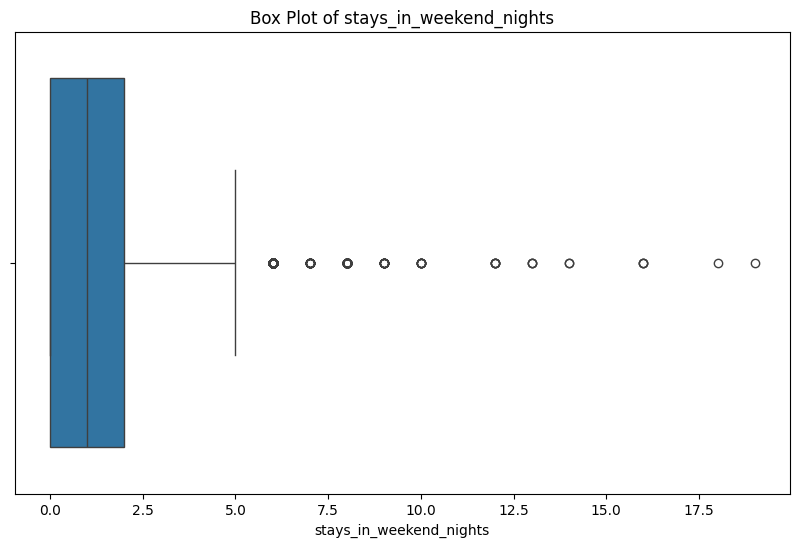

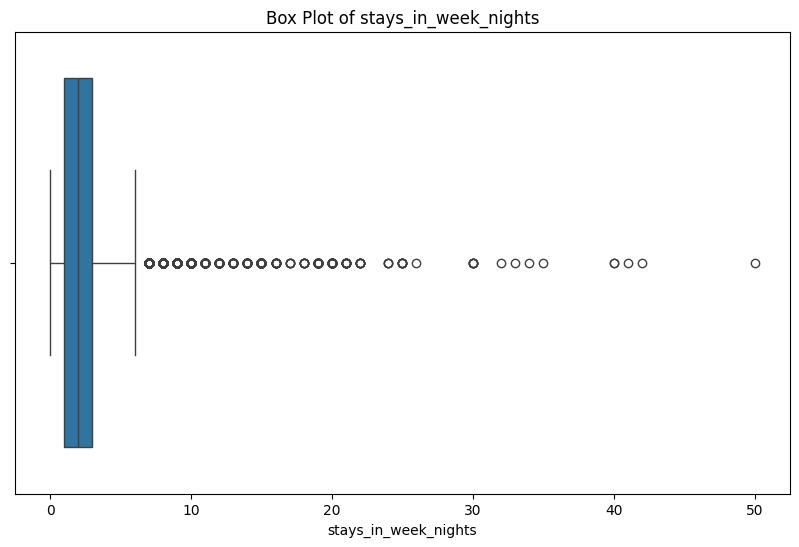

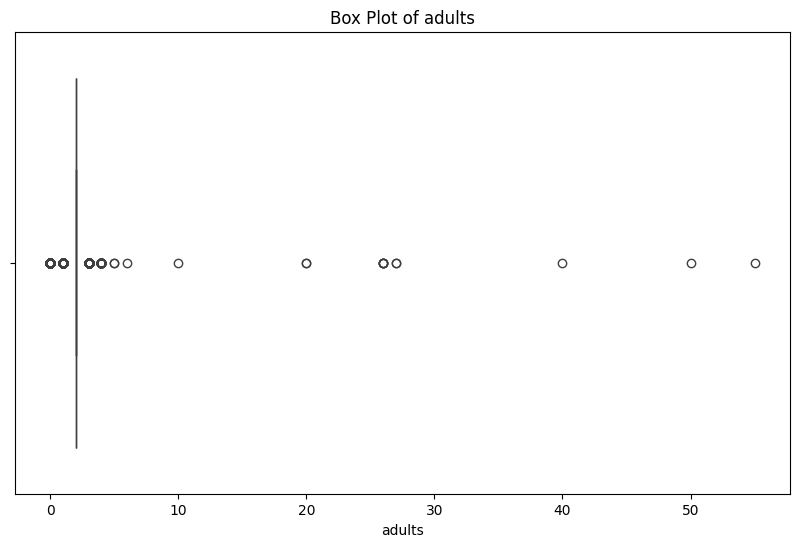

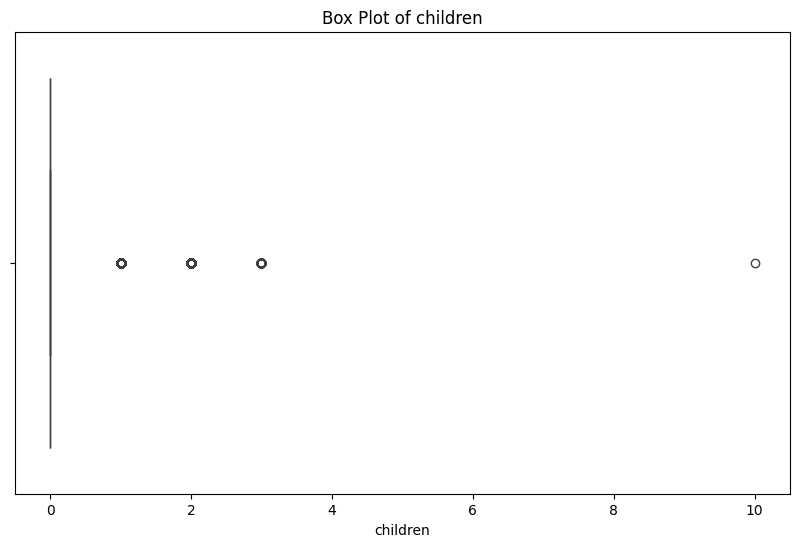

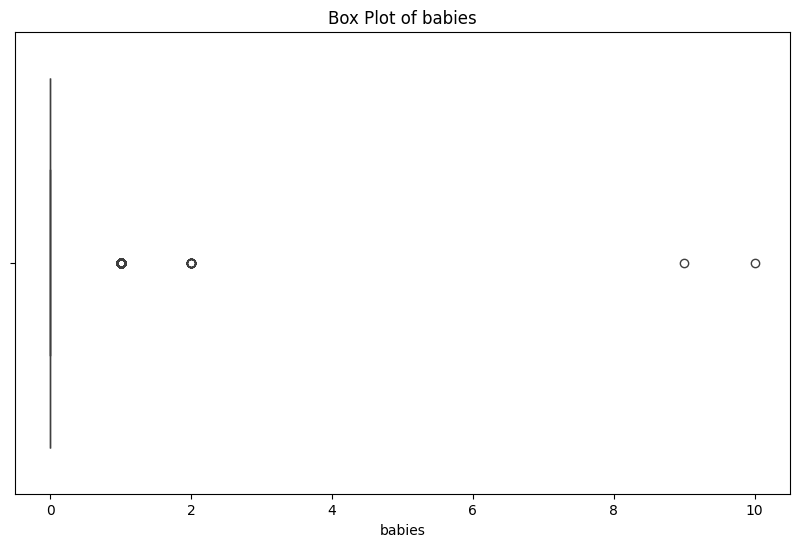

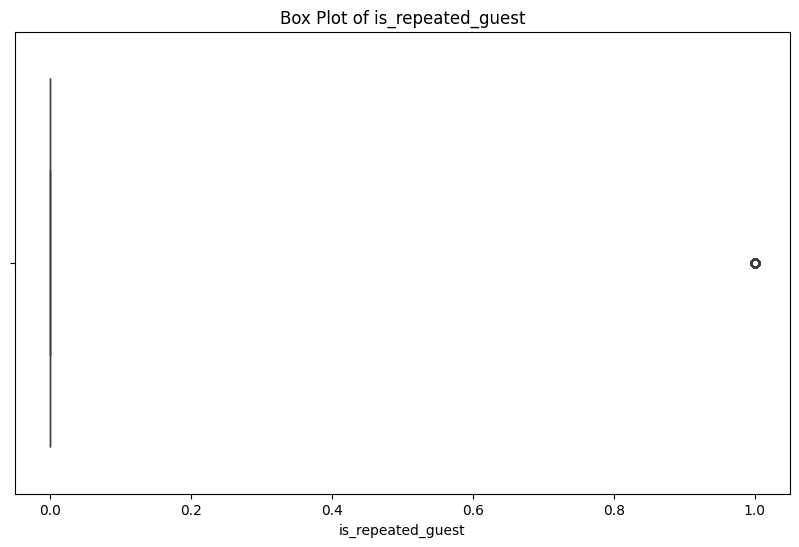

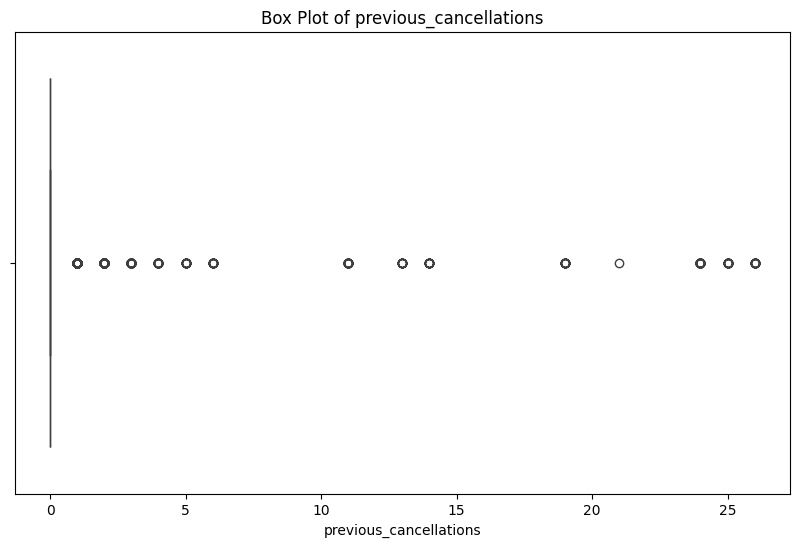

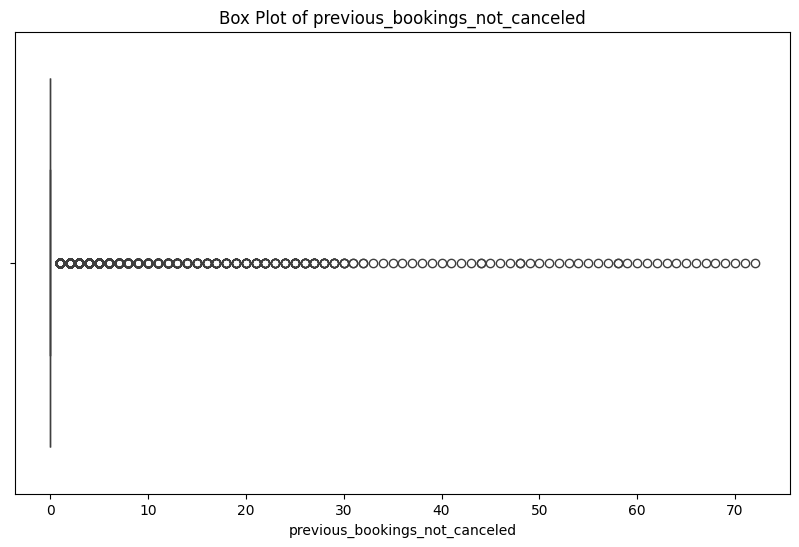

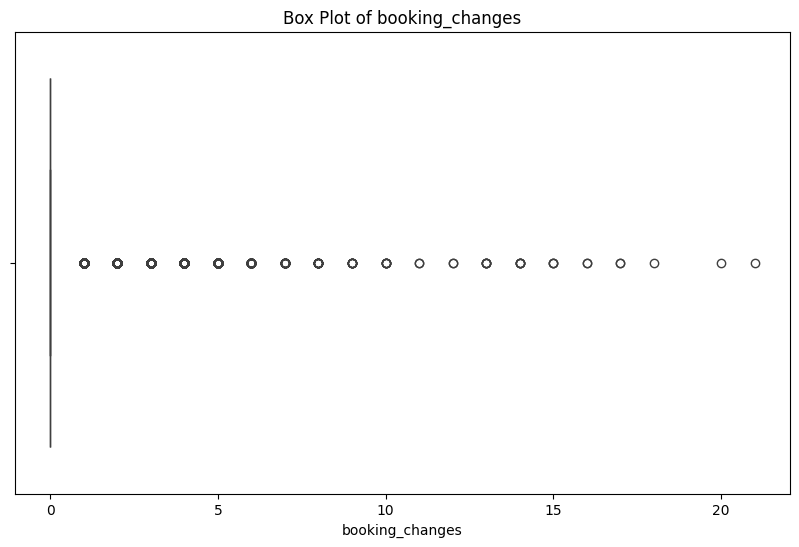

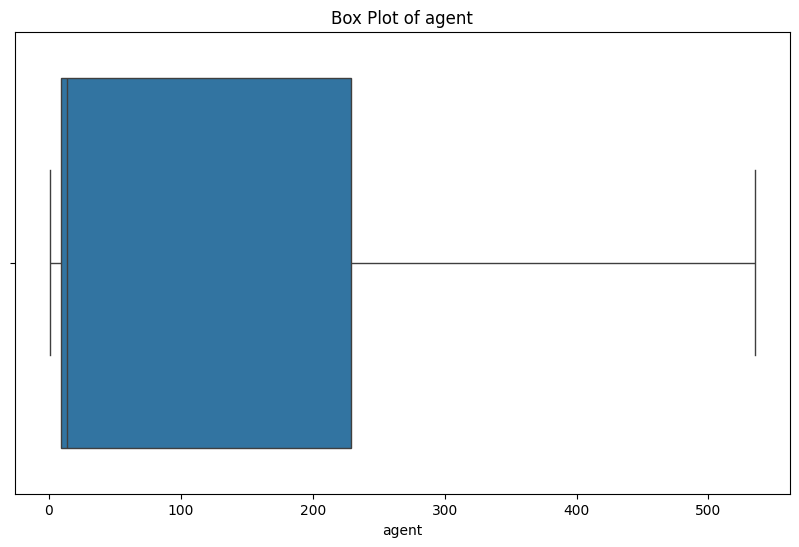

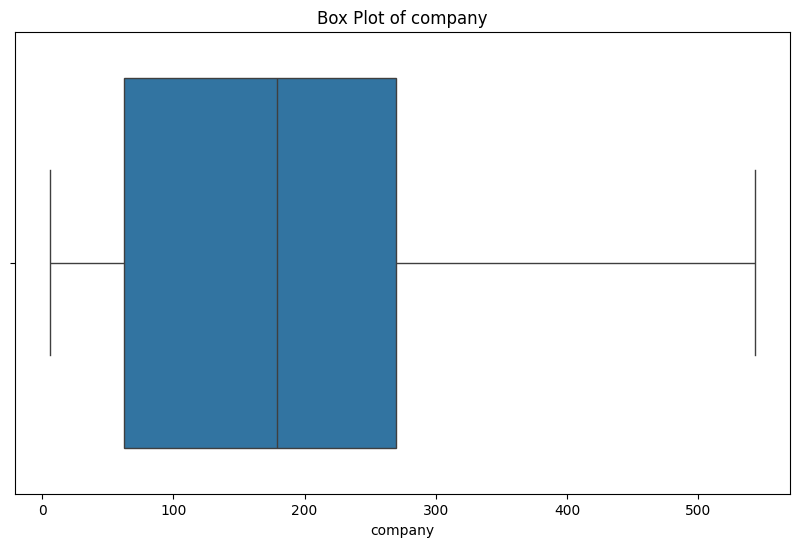

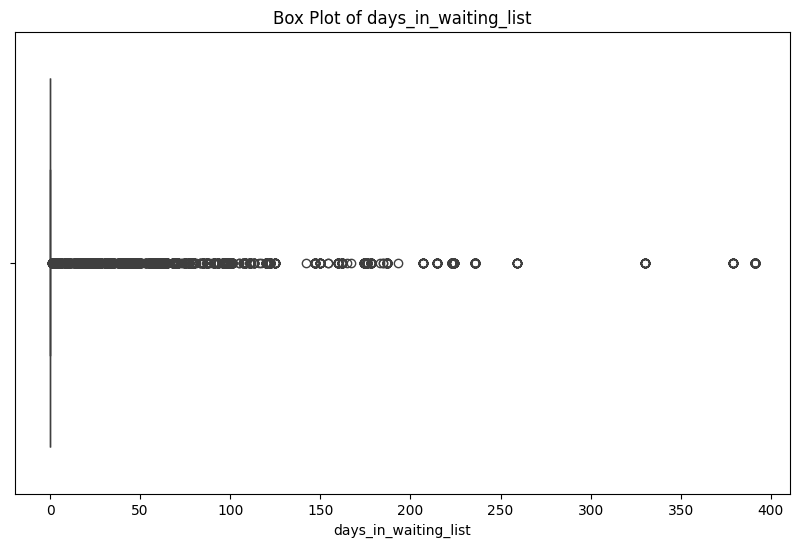

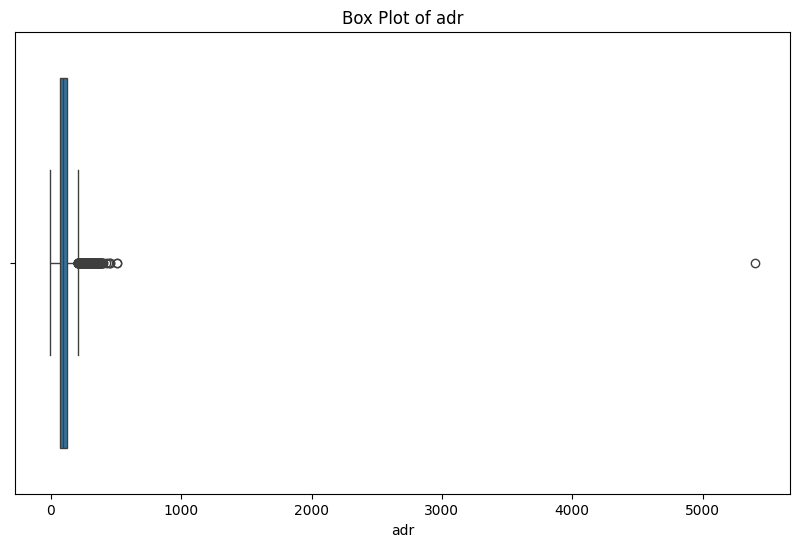

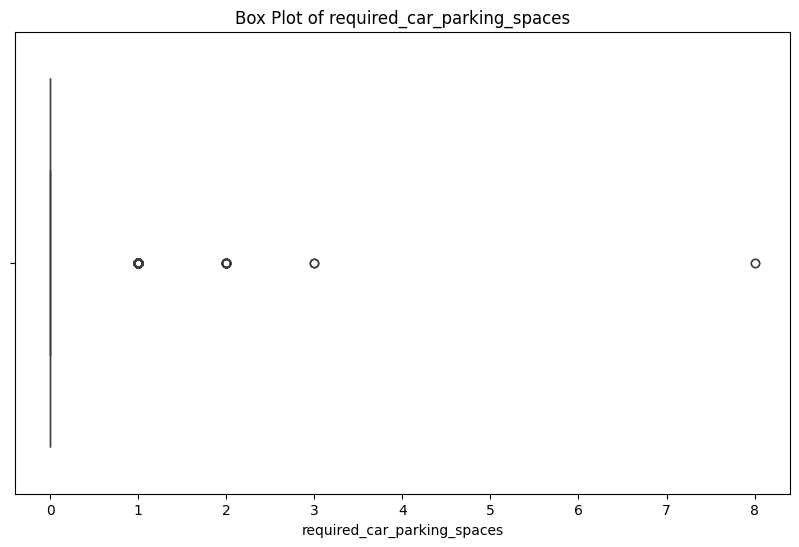

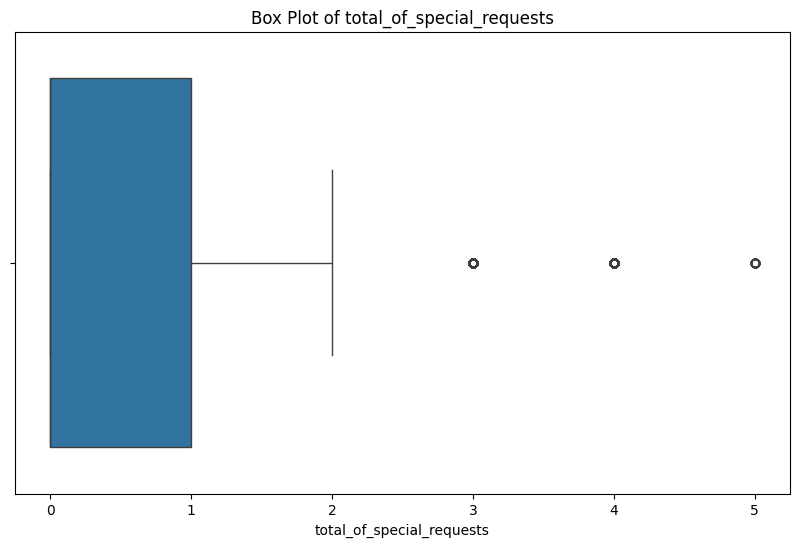

In [10]:
# using Box plot

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



In [11]:
# using IQR
def detect_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[columns] < lower_bound) | (df[columns] > upper_bound)).sum()
    return outliers , lower_bound , upper_bound # retrun lower_bound & upper bound to use it when handel outliers

outliers , lower_bound , upper_bound= detect_outliers(df, num_cols)
outliers


,0
is_canceled,0
lead_time,3005
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,265
stays_in_week_nights,3354
adults,29710
children,8590
babies,917


- Document our findings

1. Dataset Overview

     Rows: 119,390

    Columns: 32

    Types:

       20 numerical (int64 / float64)

       12 categorical (object)


2. Missing Values

    column Children : have 0.003% missing values ( can be dropped or imputed)

    colum Country : have 0.4087% missing values ( can be imputed with most frequent or use "Unknown" for missing

    column Agent : have 13.68% missing values ( impute with median or mean)

    column Company : have 94.3 % missing ( mostly drop this column)



3. Outliers (Numerical Columns)

- Columns with significant outliers:

         adults (29,710 rows) → many invalid values (more than 2 ).

         booking_changes (18,076) → extreme booking modifications.

        stays_in_week_nights (3,354) and lead_time (3,005) → unrealistic stays or booking periods.

        adr (3,793) → extreme or negative room rates.


- Columns with minor/moderate outliers:

        babies, children, previous_cancellations, days_in_waiting_list, etc.

 - Columns without outliers:

        is_canceled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, agent, company        


# Phase 2: Data Cleaning

- Handle missing values

In [12]:
# for (company and agent [float dtype])
df['company'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)

# for (country)
df["country"].fillna("Unknown", inplace=True)
# for children
df['children'].fillna(df['children'].median(), inplace=True)

In [13]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


- Remove Duplicates

In [14]:
df.shape

(119390, 32)

In [15]:
df.duplicated().sum()

np.int64(31994)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(87396, 32)

- Handle Outliers

In [18]:
lower_bound

,0
is_canceled,-1.500
lead_time,-195.000
arrival_date_year,2014.500
arrival_date_week_number,-17.000
arrival_date_day_of_month,-14.500
stays_in_weekend_nights,-3.000
stays_in_week_nights,-2.000
adults,2.000
children,0.000
babies,0.000


In [19]:
upper_bound

,0
is_canceled,2.500
lead_time,373.000
arrival_date_year,2018.500
arrival_date_week_number,71.000
arrival_date_day_of_month,45.500
stays_in_weekend_nights,5.000
stays_in_week_nights,6.000
adults,2.000
children,0.000
babies,0.000


In [20]:
lower_bound["adr"]

np.float64(-15.774999999999991)

In [21]:
# use capping method : replace any values less than lower_bound to lower_bound and
# any value greater than upper_bound to upper bound

def cap_outliers(df, columns, lower_bound, upper_bound):
      # lower_bound  & upper_bound calculated already when detecting outliers
    for col in columns:
        df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
        df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])
    return df


df = cap_outliers(df,num_cols , lower_bound , upper_bound)

- Fix Data Types

In [22]:
df.dtypes

,0
hotel,object
is_canceled,float64
lead_time,float64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,float64
arrival_date_day_of_month,float64
stays_in_weekend_nights,float64
stays_in_week_nights,float64
adults,float64


In [23]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,0.0,0.0,0.0,Transient,0.000,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0.0,373.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,0.0,0.0,0.0,Transient,0.000,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,2.0,...,No Deposit,0.0,0.0,0.0,Transient,75.000,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,2.0,...,No Deposit,304.0,0.0,0.0,Transient,75.000,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,0.0,0.0,Transient,98.000,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,...,No Deposit,394.0,0.0,0.0,Transient,96.140,0.0,0.0,Check-Out,2017-09-06
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,9.0,0.0,0.0,Transient,211.065,0.0,2.0,Check-Out,2017-09-07
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,9.0,0.0,0.0,Transient,157.710,0.0,2.5,Check-Out,2017-09-07
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,89.0,0.0,0.0,Transient,104.400,0.0,0.0,Check-Out,2017-09-07


In [24]:
# convert (reservation_status_date) to dateitem data type instead of object

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df["is_canceled"] = df["is_canceled"].astype(int)

In [25]:
cat_cols = cat_cols.drop('reservation_status_date')

# Phase 3: Feature Engineering & Preprocessing

- Create New Features

In [26]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = np.where((df['children'] > 0) | (df['babies'] > 0), "Yes", "No")


- Encode Categorical Variables

In [27]:
def get_cardinality(cols):
  for col in cols:
    print(f"{col} : {df[col].nunique()}")


get_cardinality(cat_cols)  # cat_columns defined before

hotel : 2
arrival_date_month : 12
meal : 5
country : 178
market_segment : 8
distribution_channel : 5
reserved_room_type : 10
assigned_room_type : 12
deposit_type : 3
customer_type : 4
reservation_status : 3


In [28]:
cat_cols_less_12 = ["hotel","arrival_date_month","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type",
                    "deposit_type","customer_type"]


freq_encod = ["country"]

In [29]:
# One HOt Encoder
df = pd.get_dummies(df, columns=cat_cols_less_12, drop_first=True)

In [30]:
# frequency Encoding

country_freq = df['country'].value_counts().to_dict()
df['country_freq'] = df['country'].map(country_freq)
df.drop('country', axis=1, inplace=True)

- CRITICAL STEP: Remove Data Leakage:

In [31]:
df.drop(['reservation_status_date' ,"reservation_status"], axis=1, inplace=True)

- Split Data

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

x_train , x_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)